In [113]:
import pandas as pd
%matplotlib inline

# Data source
https://data.cityofchicago.org/

Applied filter when downloading datasets from Chicago Open Data Portal:
service request completion date between 1/1/2016 - 12/31/2016

# Task 1: Download and Merge Data

In [4]:
graffiti = pd.read_csv('311_Service_Requests_-_Graffiti_Removal.csv', index_col = 'Service Request Number')

In [16]:
graffiti.columns = [x.lower() for x in graffiti.columns]
graffiti.columns

Index(['creation date', 'status', 'completion date', 'type of service request',
       'what type of surface is the graffiti on?',
       'where is the graffiti located?', 'street address', 'zip code',
       'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'ssa', 'latitude', 'longitude', 'location'],
      dtype='object')

In [104]:
headers = ['creation_date', 'status', 'completion_date', 'type', 'zip', 'ward', 'police_district', 'community_area', 'lat', 'lon']
graffiti_sub = graffiti[['creation date', 'status', 'completion date', 'type of service request', 'zip code', 'ward', 'police district', 'community area', 'latitude', 'longitude']]
graffiti_sub.columns = headers
graffiti_sub['file'] = 'graffiti'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
buildings = pd.read_csv('311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv', index_col = 'SERVICE REQUEST NUMBER')

In [70]:
buildings.columns = [x.lower() for x in buildings.columns]
buildings.columns
# Note that buildings data does not include completion date or status, so we 
# are unable to track whether a the service request was completed

Index(['service request type', 'date service request was received',
       'location of building on the lot (if garage, change type code to bgd).',
       'is the building dangerous or hazardous?',
       'is building open or boarded?',
       'if the building is open, where is the entry point?',
       'is the building currently vacant or occupied?',
       'is the building vacant due to fire?',
       'any people using property? (homeless, childen, gangs)',
       'address street number', 'address street direction',
       'address street name', 'address street suffix', 'zip code',
       'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'latitude', 'longitude', 'location'],
      dtype='object')

In [97]:
buildings_headers = ['creation_date', 'type', 'zip', 'ward', 'police_district', 'community_area', 'lat', 'lon']
buildings_sub = buildings[['date service request was received', 'service request type', 'zip code', 'ward', 'police district', 'community area', 'latitude', 'longitude']]
buildings_sub.columns = buildings_headers
buildings_sub['file'] = 'buildings'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
potholes = pd.read_csv('311_Service_Requests_-_Pot_Holes_Reported.csv', index_col = 'SERVICE REQUEST NUMBER')

In [18]:
potholes.columns = [x.lower() for x in potholes.columns]
potholes.columns

Index(['creation date', 'status', 'completion date', 'type of service request',
       'current activity', 'most recent action',
       'number of potholes filled on block', 'street address', 'zip',
       'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'ssa', 'latitude', 'longitude', 'location'],
      dtype='object')

In [96]:
potholes_sub = potholes[['creation date', 'status', 'completion date', 'type of service request', 'zip', 'ward', 'police district', 'community area', 'latitude', 'longitude']]
potholes_sub.columns = headers
potholes_sub['file'] = 'potholes'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [12]:
sanitation = pd.read_csv('311_Service_Requests_-_Sanitation_Code_Complaints.csv', index_col = 'Service Request Number')

In [19]:
sanitation.columns = [x.lower() for x in sanitation.columns]
sanitation.columns

Index(['creation date', 'status', 'completion date', 'type of service request',
       'what is the nature of this code violation?', 'street address',
       'zip code', 'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'latitude', 'longitude', 'location'],
      dtype='object')

In [105]:
sanitation_sub = sanitation[['creation date', 'status', 'completion date', 'what is the nature of this code violation?', 'zip code', 'ward', 'police district', 'community area', 'latitude', 'longitude']]
sanitation_sub.columns = headers
sanitation_sub['file'] = 'sanitation'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [106]:
df = pd.concat([graffiti_sub, buildings_sub, potholes_sub, sanitation_sub])
df.columns

Index(['community_area', 'completion_date', 'creation_date', 'file', 'lat',
       'lon', 'police_district', 'status', 'type', 'ward', 'zip'],
      dtype='object')

# Task 2: Summary statistics

In [107]:
df.columns

Index(['community_area', 'completion_date', 'creation_date', 'file', 'lat',
       'lon', 'police_district', 'status', 'type', 'ward', 'zip'],
      dtype='object')

In [136]:
# disregard duplicate requests
df = df.loc[(df['status'] != 'Open - Dup') & (df['status'] != 'Completed - Dup')]
df['status'].unique()

array(['Completed', nan, 'Open'], dtype=object)

In [137]:
df['creation_month'] = df['creation_date'].str.extract('(\d\d)')

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [109]:
df['completion_month'] = df['completion_date'].str.extract('(\d\d)')

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [119]:
month = df['creation_month'].value_counts().sort_index()
month

01    14338
02    17085
03    19198
04    19803
05    20517
06    19141
07    15975
08    18137
09    14104
10    14274
11    13042
12    11965
Name: creation_month, dtype: int64

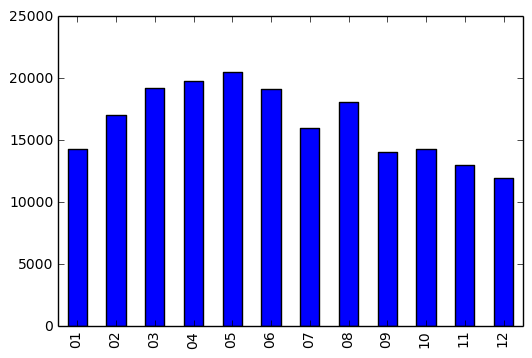

In [120]:
month.plot('bar')

In [111]:
month_category = df.groupby(['file', 'creation_month']).size()
month_category

file        creation_month
buildings   01                  190
            02                  272
            03                  358
            04                  477
            05                  602
            06                  512
            07                  437
            08                  521
            09                  401
            10                  317
            11                  250
            12                  135
graffiti    01                 9446
            02                10184
            03                10572
            04                10711
            05                10982
            06                10349
            07                 9591
            08                11863
            09                 9312
            10                 9580
            11                 9743
            12                 8128
potholes    01                 3688
            02                 5515
            03                 6727
 

In [125]:
category = df['file'].value_counts()
category

graffiti      120461
potholes       51507
sanitation     21139
buildings       4472
Name: file, dtype: int64

In [127]:
# graffiti subcateogries
graffiti_subcat = graffiti['where is the graffiti located?'].value_counts()
graffiti_subcat

Front                  38212
Side                   16898
Pole                   11358
Garage                  9893
Rear                    8337
Traffic Control Box     5407
Alley                   5330
Door                    4377
Sign                    4358
Dumpster                3805
Fence                   3310
Viaduct                 2296
Garbage Cart            1993
Mail Box                1417
Newspaper Box           1379
Bench                    790
Express Way Job          536
Overpass                 284
Hydrant                   76
Phone                     71
Name: where is the graffiti located?, dtype: int64

In [ ]:
# buildings subcategories

# Task 3: Interesting Observations

The highest number of service requests The spring and summer months 